In [17]:
'''Titanic Survivors Prediction using Python
    A classification project by Gopal Jaiswal.
    Submitted to Kaggle competition.
'''

'Titanic Survivors Prediction using Python\n    A classification project by Gopal Jaiswal.\n    Submitted to Kaggle competition.\n'

In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
#Reading train dataset
trainDf = pd.read_csv("/Users/gopaljaiswal/project/frameworks/Anaconda_python/Python_Spyder/Kaggle_Comp/Titanic_ML_Disr/data/train.csv")
testDf = pd.read_csv("/Users/gopaljaiswal/project/frameworks/Anaconda_python/Python_Spyder/Kaggle_Comp/Titanic_ML_Disr/data/test.csv")

print("Dimensions of train: {}".format(trainDf.shape))
print("Dimensions of test: {}".format(testDf.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


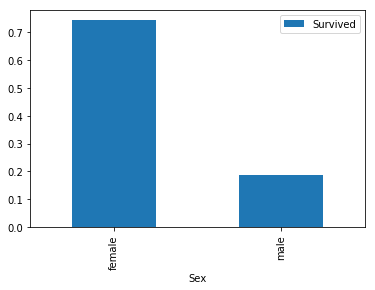

In [38]:
# Servived based on sex
%matplotlib inline
sex_pivot = trainDf.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

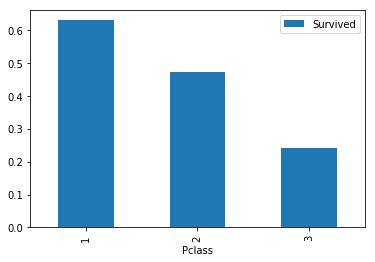

In [39]:
#Servived Based on pclass
pclass_pivot=trainDf.pivot_table(index="Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

In [43]:
#sex and pclass is categorical 
#Analysis on Age
trainDf["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

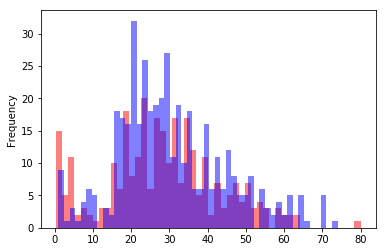

In [53]:
#Survived Vs Died Analysis based on age range
survivedDf = trainDf[trainDf["Survived"] == 1]
diedDf = trainDf[trainDf["Survived"] == 0]
survivedDf["Age"].plot.hist(alpha=0.5,color='red',bins=50)
diedDf["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Dead'])
plt.show()

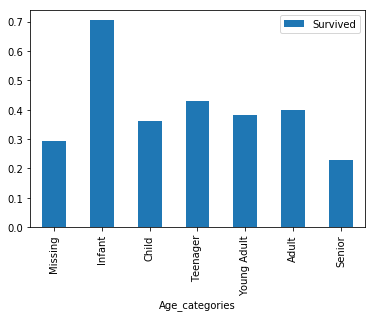

In [56]:
#We found red is more than Dead at some Age
#We are going to use pandas cut for distribution

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

trainDf = process_age(trainDf,cut_points,label_names)
testDf = process_age(testDf,cut_points,label_names)

pivot = trainDf.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()



In [58]:
#Now, time to prepare machine learning models
#Before we build our model, we need to prepare these columns for machine learning. 
#Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

#First verify Pclass column
trainDf["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [68]:
#Our goal is to divide three Pclass in new unique columns (Pclass,Sex,Age_Categories)
#We will get Pclass_1, Pclass_2, Pclass_3
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    trainDf = create_dummies(trainDf,column)
    testDf = create_dummies(testDf,column)

In [60]:
# Going to Implement First Machine Learning Algo
#Logistic Regression (scikit-learn )

# 1. Instantiate (or create) the specific machine learning model you want to use
# 2. Fit the model to the training data
# 3. Use the model to make predictions
# 4. Evaluate the accuracy of the predictions


In [70]:
#import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

#Creating an object of LogisticRegression
lr = LogisticRegression()


#Let's train our model using all of the columns we created with our create_dummies() function.

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr.fit(trainDf[columns], trainDf["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
#Going ot split in two part (80% and 20%)

holdoutDf = testDf # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = trainDf[columns]
all_y = trainDf['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [76]:
#Making predictions and measuring their accuracy
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

train_X.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
140,0,0,1,1,0,1,0,0,0,0,0,0
439,0,1,0,0,1,0,0,0,0,1,0,0
817,0,1,0,0,1,0,0,0,0,1,0,0
378,0,0,1,0,1,0,0,0,0,1,0,0
491,0,0,1,0,1,0,0,0,0,1,0,0


In [77]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.810055865922


In [78]:
#cross Validation
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[ 0.76404494  0.76404494  0.7752809   0.78651685  0.8         0.80681818
  0.80898876  0.81111111  0.83146067  0.87640449]
0.802467086596


In [81]:
#Making prediction Unseen DataSet
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdoutDf[columns])
print(trainDf['Survived'])
print(holdout_predictions)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0

In [82]:
#Submittion file Preparation

holdout_ids = holdoutDf["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [90]:
#Save DataFrame to file 
submission.to_csv("/Users/gopaljaiswal/project/frameworks/Anaconda_python/Python_Spyder/Kaggle_Comp/Titanic_ML_Disr/data/submission.csv",index=False)
